In [78]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

# Optimal Execution of Portifolio Transactions

This notebook contains a simulation inspired on the paper from Robert Almgren and Neil Chriss of "Optimal Execution of Portifolio Transactions". Please refer to the paper for the demonstration of certain formulas used in this notebook.

## Strategy and price dynamics

### Definitions

In the paper, the liquidation of a portifolio is modeled by a discretization into $N$ steps. The sequence $(x_{k})_{k\in\{1,\dots, N\}}$ represent the amount of shares we still hold at each step, hence $x_{0} = X$, where $X$ is the total amount of shares we hold, and $x_{N} = 0$. We also define $n_{k} = x_{k-1} - x_{k}$ to be the amount of shares we trade at a given step $k$.

### Permanent impact

The price evolution of the asset in this discretized configuration has the following dynamics:

$$
S_{k} = S_{k-1} + \sigma \tau^{\frac{1}{2}} \xi_{k} - \tau g\left(\frac{n_{k}}{\tau}\right)
$$

We take $\sigma$ to be the volatility of the asset, $\tau = \frac{N}{T}$ each time step, $(\xi_{i})_{i\in \{1,\dots,N\}}$ a sequence of i.i.d random variables of mean zero and unit variance. For our simulations we will stick to a normal distribution. The term $g$ contains the permanent impact of our strategy on the price of the asset.

As in the paper, we take a linear function for $g$, $g(v) = \gamma v$, hence:

$$
S_{k} = S_{0} + \sigma \sum_{j=1}^{k}\tau^{\frac{1}{2}}\xi_{j} - \gamma(X - x_{k})
$$

Where $X$ is the initial portifolio size and $x_{k}$ is the amount of units of the asset we still hold.



### Temporary impact

We will also take the temporary market impact linearly, hence we will assume that every time we trade there is an effective price that we are able to get:

$$
\tilde{S}_{k} = S_{k-1} - h\left(\frac{n_{k}}{\tau}\right) = S_{k-1} - \epsilon \text{ sgn}(n_{k}) - \frac{\eta}{\tau}n_{k}
$$



### Capture of a trajectory

The capture of a trajectory is defined as the full trading revenue upon completion of all trades. According to the paper, we have the following profit:

$$
\sum_{k = 1}^{N}n_{k}\tilde{S}_{k} = XS_{0} + \sum_{k = 1}^{N}\left(\sigma \tau^{\frac{1}{2}}\xi_{k}  - \tau g\left(\frac{n_{k}}{\tau}\right) \right) x_{k} - \sum_{k = 1}^{N} n_{k} h \left(\frac{n_{k}}{\tau}\right)
$$

Let us prove that result.

$$
\sum_{k = 1}^{N}n_{k}\tilde{S}_{k} = \sum_{k = 1}^{N} n_{k} \left(S_{k-1} - h\left(\frac{n_{k}}{\tau}\right)\right)
$$

$$
\sum_{k = 1}^{N}n_{k}\tilde{S}_{k} = \sum_{k = 1}^{N} n_{k} S_{k-1} - \sum_{k = 1}^{N} n_{k} h\left(\frac{n_{k}}{\tau}\right)
$$

We remark that $x_{0} = X$ (initial portifolio) and $x_{N} = 0$ (portifolio liquidated):

$$
\sum_{k = 1}^{N} n_{k} S_{k-1} = \sum_{k = 1}^{N} (x_{k-1} - x_{k}) S_{k-1} 
$$

$$
\sum_{k = 1}^{N} n_{k} S_{k-1} = XS_{0} + \sum_{k = 1}^{N} x_{k} (S_{k} - S_{k-1}) 
$$

$$
\sum_{k = 1}^{N} n_{k} S_{k-1} = XS_{0} + \sum_{k = 1}^{N} \left( \sigma \tau^{\frac{1}{2}} \xi_{k} - \tau g\left(\frac{n_{k}}{\tau}\right)\right)
$$

Hence, by replacing this term on the original equation we derive the desired expression:

$$
\sum_{k = 1}^{N}n_{k}\tilde{S}_{k} = XS_{0} + \sum_{k = 1}^{N} \left( \sigma \tau^{\frac{1}{2}} \xi_{k} - \tau g\left(\frac{n_{k}}{\tau}\right)\right) - \sum_{k = 1}^{N} n_{k} h\left(\frac{n_{k}}{\tau}\right)
$$

### Total cost of trading

Our total cost of trading then becomes:

$$
C = XS_{0} - \sum_{k = 1}^{N}n_{k}\tilde{S}_{k} = - \sum_{k = 1}^{N}\left(\sigma \tau^{\frac{1}{2}}\xi_{k} - \tau g\left( \frac{n_{k}}{\tau} \right) \right) x_{k} + \sum_{k=1}^{N}n_{k}h\left(\frac{n_{k}}{\tau} \right)
$$

#### General case

Let us compute the expected cost as well as the expected volatility:

$$
\mathbb{E}[C] = \mathbb{E}\left[ - \sum_{k = 1}^{N}\left(\sigma \tau^{\frac{1}{2}}\xi_{k} - \tau g\left( \frac{n_{k}}{\tau} \right) \right) x_{k} + \sum_{k=1}^{N}n_{k}h\left(\frac{n_{k}}{\tau} \right) \right]
$$

As $(\xi_{i})_{i \in \{1,\dots,N\}}$ are centered at zero:

$$
\mathbb{E}[C] = \sum_{k = 1}^{N}\tau g\left( \frac{n_{k}}{\tau} \right) x_{k} + \sum_{k=1}^{N}n_{k}h\left(\frac{n_{k}}{\tau} \right) 
$$

Similarly for the variance, as $(\xi_{i})_{i \in \{1,\dots,N\}}$ have unitary variance and are independent:

$$
\mathbb{V}[C] = \mathbb{V}\left[ - \sum_{k = 1}^{N}\left(\sigma \tau^{\frac{1}{2}}\xi_{k} - \tau g\left( \frac{n_{k}}{\tau} \right) \right) x_{k} + \sum_{k=1}^{N}n_{k}h\left(\frac{n_{k}}{\tau} \right) \right]
$$

$$
\mathbb{V}[C] = \mathbb{V}\left[- \sum_{k = 1}^{N}\sigma \tau^{\frac{1}{2}}\xi_{k} x_{k} \right]
$$

$$
\mathbb{V}[C] = \tau \sigma^{2} \sum_{k = 1}^{N} x_{k}^{2} 
$$

As obtained in the paper.

#### Linear case

Our total cost of trading then becomes:

$$
C = XS_{0} - \sum_{k = 1}^{N}n_{k}\tilde{S}_{k} = - \sum_{k = 1}^{N}\left(\sigma \tau^{\frac{1}{2}}\xi_{k} - \tau g\left( \frac{n_{k}}{\tau} \right) \right) x_{k} + \sum_{k=1}^{N}n_{k}h\left(\frac{n_{k}}{\tau} \right)
$$

Replacing the linear impact:

$$
C = - \sum_{k = 1}^{N}\left(\sigma \tau^{\frac{1}{2}}\xi_{k} - \gamma n_{k} \right) x_{k} + \sum_{k=1}^{N}n_{k} \left(\epsilon\text{ sgn}(n_{k}) + \frac{\eta}{\tau}n_{k}\right)
$$

Assuming all $n_{k}$ have the same positive sign:

$$
C = - \sum_{k = 1}^{N}\left(\sigma \tau^{\frac{1}{2}}\xi_{k} - \gamma n_{k} \right) x_{k} + \epsilon X + \frac{\eta}{\tau} \sum_{k=1}^{N}n_{k}^{2} 
$$

$$
C = - \sum_{k = 1}^{N}\sigma \tau^{\frac{1}{2}}\xi_{k}x_{k} + \sum_{k = 1}^{N}\gamma n_{k} x_{k} + \epsilon X + \frac{\eta}{\tau} \sum_{k=1}^{N}n_{k}^{2} 
$$

$$
C = - \sum_{k = 1}^{N}\sigma \tau^{\frac{1}{2}}\xi_{k}x_{k} + \frac{1}{2}\gamma X^{2} - \frac{1}{2} \gamma \sum_{k = 1}^{N}n_{k}^{2} + \epsilon X + \frac{\eta}{\tau} \sum_{k=1}^{N}n_{k}^{2} 
$$

$$
C = - \sum_{k = 1}^{N}\sigma \tau^{\frac{1}{2}}\xi_{k}x_{k} + \frac{1}{2}\gamma X^{2} + \epsilon X - \left(\frac{\eta}{\tau} - \frac{1}{2} \gamma\right) \sum_{k = 1}^{N}n_{k}^{2}  
$$

Which should yield in expected value:

$$
\mathbb{E}[C] =  \frac{1}{2}\gamma X^{2} + \epsilon X - \left(\frac{\eta}{\tau} - \frac{1}{2} \gamma \right) \sum_{k = 1}^{N}n_{k}^{2}
$$

## Minimum impact

Here we model the minimum impact strategy. As it is shown in the paper, it is the one of lowest expected value. For this strategy we have the following expected value:

$$
E = \frac{1}{2} \gamma X^{2} + \epsilon X + \left(\eta - \frac{1}{2}\gamma \tau\right)\frac{X^{2}}{T}
$$

Which can be easily obtained by replacing $n_{k} = \frac{X}{N}$.

As for the volatility, the obtained expression is:

$$
V = \frac{1}{3}\sigma^{2}X^{2}T\left(1 - \frac{1}{N}\right)\left(1 - \frac{1}{2N}\right)
$$

Let us prove this result:

$$
V = \tau \sigma^{2} \sum_{k = 1}^{N}x_{k}^{2} 
$$

$$
V = \tau \sigma^{2} \sum_{k = 1}^{N} \left(X - \frac{k}{N} X\right)^{2} 
$$

$$
V = \frac{1}{N^{2}}  \tau \sigma^{2} X^{2} \sum_{k = 1}^{N-1} k^{2}
$$

$$
V = \frac{1}{N^{2}}  \tau \sigma^{2} X^{2} \sum_{k = 1}^{N-1} k^{2}
$$

$$
V = \frac{N(N-1)(2N-1)}{6}  \frac{1}{N^{2}}  \tau \sigma^{2} X^{2} 
$$

$$
V = \frac{1}{3} \left(1 - \frac{1}{2N}\right) \left(1 - \frac{1}{N}\right) \tau \sigma^{2} X^{2} 
$$

Which is the result we wanted to prove.

In this section we will simulate such strategy and verify if it follows indeed the theoretical prediction.

In [79]:
def update_price(
        S: float, 
        sigma: float, 
        tau: float, 
        gamma: float,
        n: float
        ) -> float:
    '''
    Takes as input the previous price and returns the new one
    '''
    return S + sigma*np.sqrt(tau)*np.random.normal(0,1) - gamma*n
    

def linear_effective_price(
        S: float, 
        n: float, 
        eps: float, 
        tau: float,
        eta : float
        ) -> float:
    '''
    Gets the effective price of a trade in the linear setting
    '''
    return S - eps*np.abs(n) - (eta/tau)*n

def get_linear_position(
        X: float, 
        N: int
        ) -> float:
    '''
    Gets the position at each step for linear setting
    '''
    return X/N

def update_portifolio(
        X: float, 
        n: float
        ) -> float:
    '''
    Updates the amount of shares we hold
    '''
    return X - n

def complete_simulation(X: float,
        gamma: float,
        eps: float,
        eta: float,
        sigma: float, 
        T: float, 
        N: int,
        portifolio_size: np.array
        ) -> float:
    
    ## Variable cost
    # Generates all gaussians
    tau = T/N
    ran_var = sigma*np.sqrt(tau)*np.random.normal(0, 1, N)

    cost_var = np.dot(portifolio_size, ran_var)

    ## Getting term of nks

    ns = np.ones(N)
    ns[1:] = portifolio_size[:-1] - portifolio_size[1:]
    ns[0] = 1-portifolio_size[0]

    ns_term = (eta - (gamma*tau/2))*np.sum(ns**2)

    return (1/2)*gamma*X**2 + eps*X + ns_term - cost_var

def complete_simulation_expected(X: float,
        gamma: float,
        eps: float,
        eta: float,
        sigma: float, 
        T: float, 
        N: int,
        portifolio_size: np.array
        ) -> float:
    
    tau = T/N

    ## Getting term of nks

    ns = np.ones(N)
    ns[1:] = portifolio_size[:-1] - portifolio_size[1:]
    ns[0] = X-portifolio_size[0]

    ns_term = (eta - (gamma*tau/2))*np.sum(ns**2)

    return (1/2)*gamma*X**2 + eps*X + (1/tau) * ns_term 

def complete_simulation_variance(X: float,
        gamma: float,
        eps: float,
        eta: float,
        sigma: float, 
        T: float, 
        N: int,
        portifolio_size: np.array
        ) -> float: #the variance based on the startegy
    tau = T/N
    
    return sigma**2 *tau* float(np.sum(portifolio_size**2))

def complete_simulation_equally( 
        X: float,
        gamma: float,
        eps: float,
        eta: float,
        sigma: float, 
        T: float, 
        N: int
        ) -> float:
    '''
    Simulates the strategy by running all steps at once return the cost of the strategy
    '''
    
    ## Variable cost
    # Generates all gaussians
    tau = T/N
    ran_var = sigma*np.sqrt(tau)*np.random.normal(0, 1, N)

    # Equally spaced portifolio
    xs = X * (1 - np.arange(1,N+1) / N)

    cost_var = np.dot(xs, ran_var)

    return (1/2)*gamma*X**2 + eps*X + (eta - (gamma*tau/2))*(X**2/T) - cost_var

def expected_linear_trading_cost(
        X: float, 
        gamma: float, 
        eps: float, 
        eta: float, 
        T: float, 
        N: int
        ) -> float:
    '''
    Computes the expected value of the linear strategy
    '''
    tau = T/N

    return (1/2)*gamma*X**2 + eps*X + (eta - (gamma*tau/2))*(X**2/T)

In [80]:
# Parameters taken from the paper
S0 = 50
X = 1e6
T = 5
N = 5
sigma = 0.95
eps = 0.0625
gamma = 2.5 * 1e-7
eta = 2.5 * 1e-6

tau = T/N

# Generating gaussians
xi = np.random.normal(0,1,N)
ns = np.ones(N) / N

### Studying the shape of the cost of trading under linear assumptions (lower cost configuration)

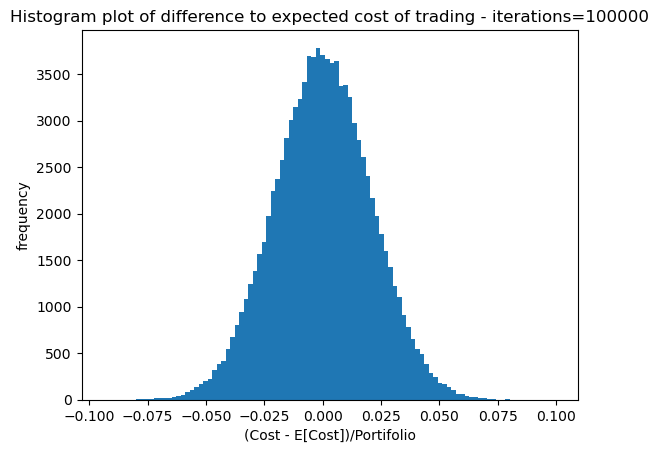

4.8013784539491534e-05
0.02078309953111469


In [81]:
iterations = int(1e5)

percentage_difference = [(complete_simulation_equally(X,gamma,eps,eta,sigma,T,N) - expected_linear_trading_cost(X,gamma,eps,eta,T,N))/ (S0 * X) for _ in range(iterations)]

plt.hist(percentage_difference, bins = 100)
plt.title(f"Histogram plot of difference to expected cost of trading - {iterations=}")
plt.ylabel('frequency')
plt.xlabel('(Cost - E[Cost])/Portifolio')
plt.show()

print(np.mean(percentage_difference))
print(np.std(percentage_difference))

## The Optimal Strategy based on the risk aversion 

One can directly affirm that the optimal strategy would be to minimize the expectation of shortfall, but in this case, this strategy will lead to a bigger variance, hence a high risk.
Also in the other hand, minimizing variance will lead to maximizing the expectation of shortfall. Hence, an optimal strategy doesn't not have a meaning without introducing $\lambda$ *the risk aversion* of the trader. 

An optimal strategy is the solution of 
$$\min_x \left(E(x)+\lambda V(x)\right )$$

If $\lambda >0$ the objective function is strictly convex, hence there is a unique optimal solution $x^*(\lambda)$.


### Solving the problem :

(We will solve the problem under these conditions : the $n_j$ must be of the same sign, the permanent and temporary impact function must be as described above)

We determine the unique global minimum by setting the partial derivatives of the objective function to zero, and after solving some system of equations, we get : 

$$x_j=\frac{sinh(\kappa(T-t_j))}{sinh(\kappa T)}X \ \ \ \ ; j = 0,...,N $$

Hence 

$$n_j  = \frac{2sinh( \frac{1}{2} \kappa \tau)}{sinh(\kappa T)}  cosh(\kappa (T-t_{j-\frac{1}{2}}))X$$

wheot $t_{j-\frac{1}{2}} = (j-\frac{1}{2})\tau$ and where $\kappa$ is defined by this system 

$$\left\{
    \begin{array}{ll}
        \frac{2}{\tau^2}\left(cosh(\kappa \tau) - 1\right) = \tilde{\kappa}^2  \\
        \\
        \tilde{\kappa}^2 = \frac{\lambda \sigma^2}{\tilde{\eta}} = \frac{\lambda \sigma^2}{\eta(1-\frac{\gamma \tau}{2 \eta})}
    \end{array}
\right .
$$

The corresponding expectation and variance :


$$E(X)= \frac{1}{2}\gamma X^2 + \epsilon X + \tilde{\eta}X^2 \frac{tanh(\frac{1}{2}\kappa\tau) \left(\tau sinh(2\kappa T) + 2Tsinh(\kappa \tau) \right)}{2\tau^2 sinh^2(\kappa \tau)}$$


$$V(X) = \frac{1}{2} \sigma^2 X^2 \frac{\tau sinh(\kappa T)cosh(\kappa(T-\tau))-Tsinh(\kappa\tau)}{sinh^2(\kappa T)sinh(\kappa \tau)}$$

Let us now prove the equations given above.

Let $U(x) = E(x) + \lambda V(x)$, hence:

$$
U(x) = E(x) + \lambda V(x) = \sum_{k = 1}^{N}\tau g\left( \frac{n_{k}}{\tau} \right) x_{k} + \sum_{k=1}^{N}n_{k}h\left(\frac{n_{k}}{\tau} \right) + \lambda \tau \sigma^{2} \sum_{k = 1}^{N} x_{k}^{2} 
$$

As we are dealing with the linear case, let us replace by the already computed expected value:

$$
U(x) = \frac{1}{2}\gamma X^{2} + \epsilon X - \left(\frac{\eta}{\tau} - \frac{1}{2} \gamma \right) \sum_{k = 1}^{N}n_{k}^{2} + \lambda \tau \sigma^{2} \sum_{k = 1}^{N} x_{k}^{2} 
$$

Let us take the derivative with respect to a coordinate $j$:

$$
\frac{\partial U}{\partial x_{j}} = 2\tau \left( \lambda \sigma^{2} x_{j} - \tilde{\eta} \frac{x_{j-1} - 2x_{j} + x_{j+1}}{\tau^{2}} \right) 
$$

Which most be equals to zero at the point of minimum:

$$
\frac{1}{\tau^{2}}(x_{j-1} - 2 x_{j} + x_{j+1}) = \tilde{k}^{2} x_{j}
$$

With $\tilde{k} = \frac{\lambda \sigma^{2}}{\tilde{\eta}}$.

### Implementing functions

In [82]:
def compute_xs(
        X: float, 
        T: float, 
        t: float, 
        k: float
        ) -> np.array:
    '''
    Intermediary function for the optimal portifolio computation
    '''
    return X * np.sinh(k* (T - t)) / np.sinh(k*T)

def optimal_allocation(
        X: float, 
        gamma: float, 
        eps: float, 
        eta: float, 
        T: float, 
        N: int,
        sigma:float,
        lamb : float
        ) -> np.array:

    '''
    Computes the optimal portifolio size at each step
    '''
    
    portifolio_size = np.zeros(N)
    
    tau = T / N
    k_tilde2 = (lamb * sigma**2) / (eta * (1 - (gamma*tau)/(2*eta)))
    k = np.arccosh(1 + (tau**2 / 2) * k_tilde2) / tau 

    ts = np.arange(1,N+1) * tau
    Vcompute_xs = np.vectorize(lambda x : compute_xs(X,T,x,k))

    portifolio_size = Vcompute_xs(ts)

    return portifolio_size

### Visualizing the portifolio

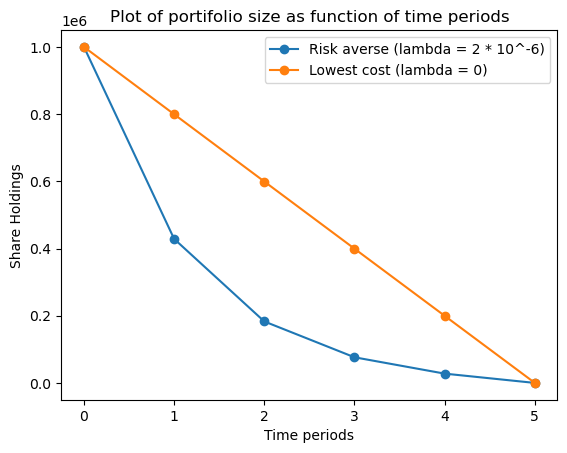

In [83]:
portifolio_size = np.ones(N+1) * X
portifolio_size_neutral = np.ones(N+1) * X

portifolio_size[1:] = optimal_allocation(X,gamma,eps,eta,T,N,sigma,2*1e-6)
portifolio_size_neutral[1:] = optimal_allocation(X,gamma,eps,eta,T,N,sigma,1e-9)

plt.plot(portifolio_size, linestyle = '-', marker = 'o')
plt.plot(portifolio_size_neutral, marker = 'o')
plt.title('Plot of portifolio size as function of time periods')
plt.legend(['Risk averse (lambda = 2 * 10^-6)', 'Lowest cost (lambda = 0)'])
plt.xlabel('Time periods')
plt.ylabel('Share Holdings')
plt.show()

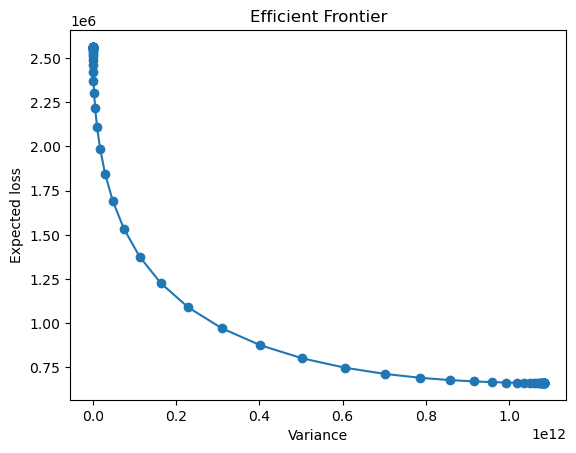

1140715.1670497851
201931287150.52448
1544577.741350834


In [84]:
def expectation_optimal_strat(
        X: float, 
        gamma: float, 
        eps: float, 
        eta: float, 
        T: float, 
        N: int , 
        sigma: float,
        lamb : float
        ) -> float:
    '''
    Computes the above expected value of the optimal strategy
    '''
    tau = T/N
    k_tilde2 = (lamb * sigma**2) / (eta * (1 - (gamma*tau)/(2*eta)))
    k = np.arccosh(1 + (tau**2 / 2) * k_tilde2) / tau 
    eta_tilde = eta*(1-(gamma*tau/(2*eta)))

    return 1/2*gamma*X**2 + eps*X + eta_tilde * X**2 * np.tanh(1/2*k*tau)*(tau*np.sinh(2*k*T)+2*T*np.sinh(k*tau))/(2*tau**2*np.sinh(k*T)**2)


def variance_optimal_start(
        X: float, 
        gamma: float, 
        eps: float, 
        eta: float, 
        T: float, 
        N: int , 
        sigma: float,
        lamb : float
        ) -> float:
    '''
    Computes the variance of the optimal strategy
    '''
    tau = T/N
    k_tilde2 = (lamb * sigma**2) / (eta * (1 - (gamma*tau)/(2*eta)))
    k = np.arccosh(1 + (tau**2 / 2) * k_tilde2) / tau 

    
    return 1/2*(sigma**2)*(X**2)*(tau*np.sinh(k*T)*np.cosh(k*(T-tau))-T*np.sinh(k*tau))/(np.sinh(k*T)**2*np.sinh(k*tau))


def plot_efficient_frontier(
        X: float, 
        gamma: float, 
        eps: float, 
        eta: float, 
        T: float, 
        N: int 
    ):
    
    n = 50
    p = 10**(-6)

    Lambda = np.geomspace(1e-15, 1, 100)
    
    Compute_E =  np.vectorize(lambda x : expectation_optimal_strat(X, gamma, eps, eta, T, N, sigma, x))
    Compute_V =  np.vectorize(lambda x : variance_optimal_start(X, gamma, eps, eta, T, N, sigma, x))
    
    E = Compute_E(Lambda)
    V = Compute_V(Lambda)
  
    plt.plot(V,E, marker =  'o')
    plt.title('Efficient Frontier')
    plt.xlabel('Variance')
    plt.ylabel('Expected loss')
  
    plt.show()
   

plot_efficient_frontier(X,gamma,eps,eta,T,N)

lamb = 2*1e-6
Compute_E =  expectation_optimal_strat(X, gamma, eps, eta, T, N, sigma, lamb)
Compute_V =  variance_optimal_start(X, gamma, eps, eta, T, N, sigma, lamb)
print(Compute_E)
print(Compute_V)
print(Compute_E+Compute_V*lamb)

## Analysing impact of misscalculation of asset volatility

In the experment below, we consider an asset with a volatilty = 0.95. We analyze the effect and the impact of misevaluationg the volatility on the utility function of the trader, for a fixed $\lambda$ (risk aversy) equal to $2*10^{-6}$

Our approach, we suppose that a trader chooses a volatility = bad_sigma, we compute his optimal strategy based on the choosen volatility (bad_sigma). Afterward, we evaluate his strategy with the real value of sigma, by calculating the real final utility function.

the garph show the real utility function with respect to bad_sigma.

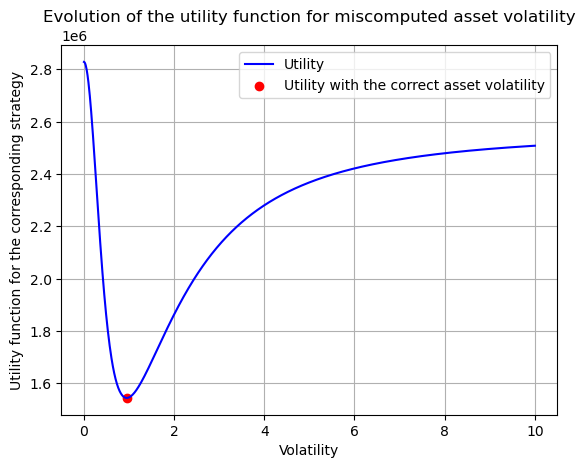

In [111]:
lamb = 2*1e-6
correct_sigma = sigma

bad_sigmas = np.linspace(0.001, 10, 1000)
cost = np.zeros(len(bad_sigmas))
var = np.zeros(len(bad_sigmas))

for idx, bad_sigma in enumerate(bad_sigmas):
    allocation_bad_sigma = optimal_allocation(X,gamma,eps,eta,T,N,bad_sigma,lamb)
    cost[idx] = complete_simulation_expected(X,gamma,eps,eta,correct_sigma,T,N,allocation_bad_sigma)
    var[idx] = complete_simulation_variance(X,gamma,eps,eta,correct_sigma,T,N,allocation_bad_sigma)
    
utility = cost + var * lamb


correct_cost = expectation_optimal_strat(X,gamma,eps,eta,T,N,correct_sigma,lamb) 
correct_var = variance_optimal_start(X,gamma,eps,eta,T,N,correct_sigma,lamb)
utility_correct = correct_cost + lamb * correct_var


fig, ax = plt.subplots()

ax.plot(bad_sigmas, utility, label='Utility', color='blue', linestyle='-')

ax.scatter(correct_sigma, utility_correct, marker='o', color='red', label='Utility with the correct asset volatility')
# Set plot labels and title
ax.set_title("Evolution of the utility function for miscomputed asset volatility")
ax.set_xlabel("Volatility")
ax.set_ylabel("Utility function for the corresponding strategy")

# Add legend
ax.legend()

# Add grid lines
ax.grid(True)

# Show the plot
plt.show()


We remark that when a trader miscompute the volatility, the utility increases even for small variation of sigma. In fact, the volatility has a large effect on the variance, as we know that for a portfolio strategy $(x_i)$ the corresponding variance is $V(X) =  \sigma^2 * \large \sum_{i=1} \tau x_i^2$.